## Прогнозирование временных рядов

In [1]:
import pandas as pd
import numpy as np
import calendar
import statsmodels.api as sm
import matplotlib.pyplot as plt

%matplotlib inline

### Question 1

Какие компоненты обычно выделяют во временных рядах?

**Answer:** Тренд, цикл, сезонность, ошибка

### Question 2

Какие особенности характерны для временных рядов?

* Значение признака, измерения которого составляют ряд, могут колебаться, но их распределение во времени не меняется (FALSE)

* Временной ряд — это набор пар $(t, y_t)$, где $t$ — произвольные моменты времени, а $y_t$ — значения признака y в эти моменты (FALSE)

* Временные ряды, как правило, автокоррелированы, то есть, их значения в каждый момент времени в каком-то смысле похожи на значения в недавнем прошлом. (TRUE)

### Question 3

Из каких слагаемых состоит модель ARMA(p,q)?

* Константа $\alpha$ (TRUE)

* $p$ предыдущих значений ряда с постоянными коэффициентами (TRUE)

* $p$ предыдущих значений ошибки с постоянными коэффициентами (FALSE)

* Ошибка $\varepsilon_t$ (TRUE)

### Question 4

Какие из параметров модели SARIMA настраиваются с помощью метода наименьших квадратов?

* Длина сезонного периода $S$ (FALSE)

* Порядки авторегрессионных компонент $p,P$ (FALSE)

* Порядки компонент скользящего среднего $q,Q$ (FALSE)

* Порядки дифференцирования $d,D$ (FALSE)

* Значения коэффициентов $\phi$ и $\theta$ перед предыдущими значениями ряда и предыдущими значениями ошибки (TRUE)

* Значение константы $\alpha$ (TRUE)

### Question 5

Какой эвристический метод позволяет выбрать начальное приближение для гиперпараметров p и P в сезонной модели ARIMA?

* Анализ распределения червей в гнилой печени овцы (FALSE)

* Анализ автокорреляционной функции (FALSE)

* Анализ частичной автокорреляционной функции (TRUE)

### Question 6

В приложенном файле — данные по ежемесячному уровню производства молока в фунтах на одну корову.

Загрузите ряд, создайте новый ряд значений среднего дневного уровня производства молока в фунтах на одну корову, поделив на число дней в месяце (вычисляется с помощью функции monthrange из пакета calendar). Постройте график полученного ряда; какой из приведённых ниже графиков у вас получился?

In [2]:
data = pd.read_csv('data/monthly-milk-production.csv',';', index_col=['month'], parse_dates=['month'], dayfirst=True)
data.head()

,milk
month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


In [3]:
for month_id in data.index:
    data.loc[month_id, 'num_days'] = calendar.monthrange(month_id.year, month_id.month)[1]
    
data['daily'] = data['milk']/data['num_days']

In [4]:
data.head()

,milk,num_days,daily
month,,,
1962-01-01,589,31.0,19.000000
1962-02-01,561,28.0,20.035714
1962-03-01,640,31.0,20.645161
1962-04-01,656,30.0,21.866667
1962-05-01,727,31.0,23.451613


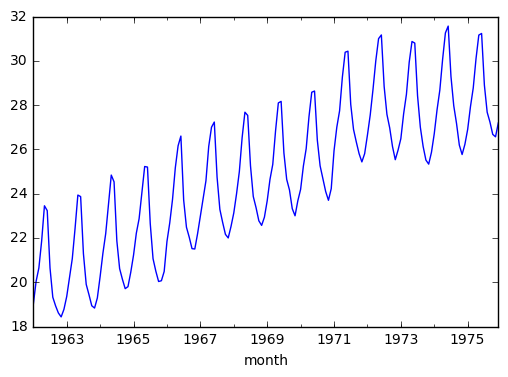

In [5]:
data['daily'].plot()
plt.show()

### Question 7

Для ряда со средним дневным количеством молока на корову из предыдущего вопроса давайте с помощью критерий Дики-Фуллера подберём порядок дифференцирования, при котором ряд становится стационарным.

Дифференцирование можно делать так:

    milk.daily_diff1 = milk.daily - milk.daily.shift(1)

Чтобы сделать сезонное дифференцирование, нужно изменить значение параметра у функции shift:

    milk.daily_diff12 = milk.daily - milk.daily.shift(12)
    
При дифференцировании длина ряда сокращается, поэтому в части строк в новой колонке значения будут не определены (NaN). Подавая полученные столбцы на вход критерию Дики-Фуллера, отрезайте неопределённые значения, иначе вы получите неопределённый достигаемый уровень значимости.

Итак, какое дифференцирование делает ряд стационарным?

In [6]:
data['daily_diff1'] = data['daily'] - data['daily'].shift(1)
data['daily_diff12'] = data['daily'] - data['daily'].shift(12)
data.head()

,milk,num_days,daily,daily_diff1,daily_diff12
month,,,,,
1962-01-01,589,31.0,19.000000,NaN,NaN
1962-02-01,561,28.0,20.035714,1.035714,NaN
1962-03-01,640,31.0,20.645161,0.609447,NaN
1962-04-01,656,30.0,21.866667,1.221505,NaN
1962-05-01,727,31.0,23.451613,1.584946,NaN


In [7]:
print "Dickey-Fuller test: \n", sm.tsa.stattools.adfuller(data['daily'].values)

Dickey-Fuller test: 
(-1.1798216373266039, 0.68221515130814403, 12L, 155L, {'5%': -2.8803740821053339, '1%': -3.4732590518613002, '10%': -2.5768120811654525}, -1.5708067458066353)


In [8]:
print "Differentiation, Dickey-Fuller test: \n", sm.tsa.stattools.adfuller(data.daily_diff1.dropna().values)

Differentiation, Dickey-Fuller test: 
(-2.7594694762289382, 0.064300546541742651, 11L, 155L, {'5%': -2.8803740821053339, '1%': -3.4732590518613002, '10%': -2.5768120811654525}, -1.153997338105512)


In [9]:
print "Season differentiation, Dickey-Fuller test: \n", sm.tsa.stattools.adfuller(data.daily_diff12.dropna().values)

Season differentiation, Dickey-Fuller test: 
(-2.1594860932888071, 0.221276726588304, 12L, 143L, {'5%': -2.8819726324025625, '1%': -3.4769274060112707, '10%': -2.5776654080884152}, -25.225679141303317)


In [10]:
data['daily_diff_two'] = data['daily'] - data['daily'].shift(12)
data['daily_diff_two'] = data['daily_diff_two'] - data['daily_diff_two'].shift(1)

In [11]:
print "Two differentiations, Dickey-Fuller test: \n", sm.tsa.stattools.adfuller(data.daily_diff_two.dropna().values)

Two differentiations, Dickey-Fuller test: 
(-5.4813263347969325, 2.2808455518036712e-06, 11L, 143L, {'5%': -2.8819726324025625, '1%': -3.4769274060112707, '10%': -2.5776654080884152}, -20.905137509892256)


* Дифференцирование не нужно, исходный ряд уже стационарен

* Ряд становится стационарным после однократного дифференцирования

* Ряд становится стационарным после сезонного дифференцирования

* Ряд становится стационарным после двух последовательных дифференцирований — сезонного и обычного (TRUE)

### Question 8

Для стационарного ряда из предыдущего вопроса (продифференцированного столько раз, сколько вы посчитали нужным) постройте график автокорреляционной функции. Это можно cделать так:

    import statsmodels.api as sm
    sm.graphics.tsa.plot_acf(ряд.values.squeeze(), lags=50)
    
Исходя из этого графика, какое начальное приближение вы предложили бы для параметра $Q$ в модели SARIMA?

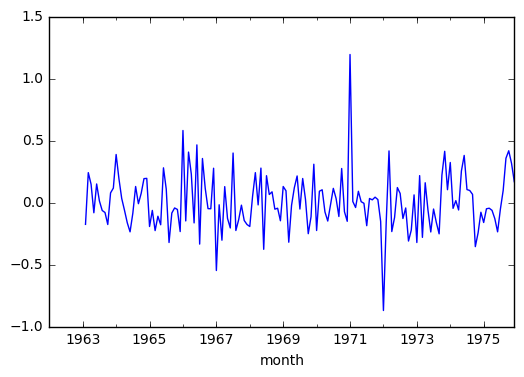

In [12]:
data.daily_diff_two.plot()

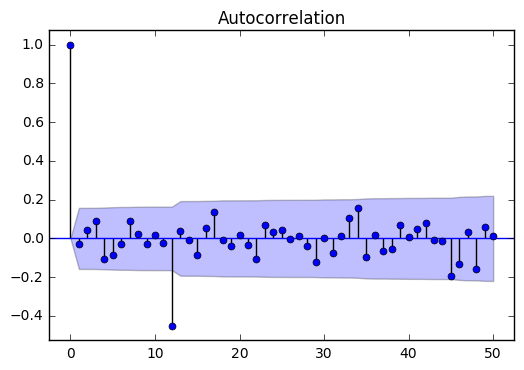

In [13]:
sm.graphics.tsa.plot_acf(data.daily_diff_two.dropna().values.squeeze(), lags=50)
plt.show()

**Answer:** 1

### Question 9 

Для того же ряда, что и в предыдущем вопросе, постройте график частичной автокорреляционной функции. Это можно сделать так:

    import statsmodels.api as sm
    sm.graphics.tsa.plot_pacf(ряд.values.squeeze(), lags=50)
    
Исходя из этого графика, какое начальное приближение вы предложили бы для параметра $p$ в модели SARIMA?

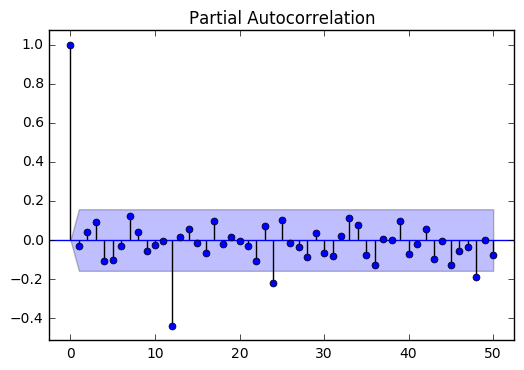

In [14]:
sm.graphics.tsa.plot_pacf(data.daily_diff_two.dropna().values.squeeze(), lags=50)
plt.show()

**Answer:** 0